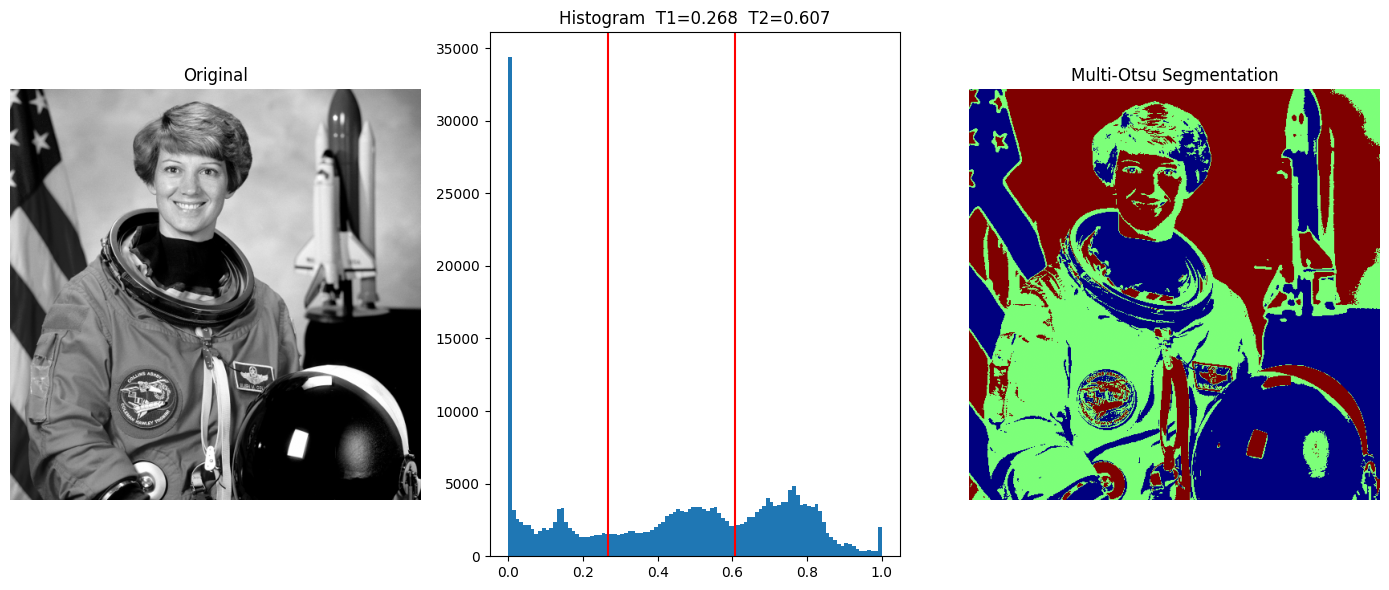

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage.filters import threshold_multiotsu

image = data.astronaut()
gray = rgb2gray(image)

flat_data = gray.flatten()
thresholds = threshold_multiotsu(gray)
regions = np.digitize(gray, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(flat_data, bins=100, range=[flat_data.min(), flat_data.max()])
ax[1].set_title(f'Histogram  T1={thresholds[0]:.3f}  T2={thresholds[1]:.3f}')
for t in thresholds:
    ax[1].axvline(t, color='r')

ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu Segmentation')
ax[2].axis('off')

plt.tight_layout()
plt.savefig('task1_multiotsu_segmentation.png')
plt.show()


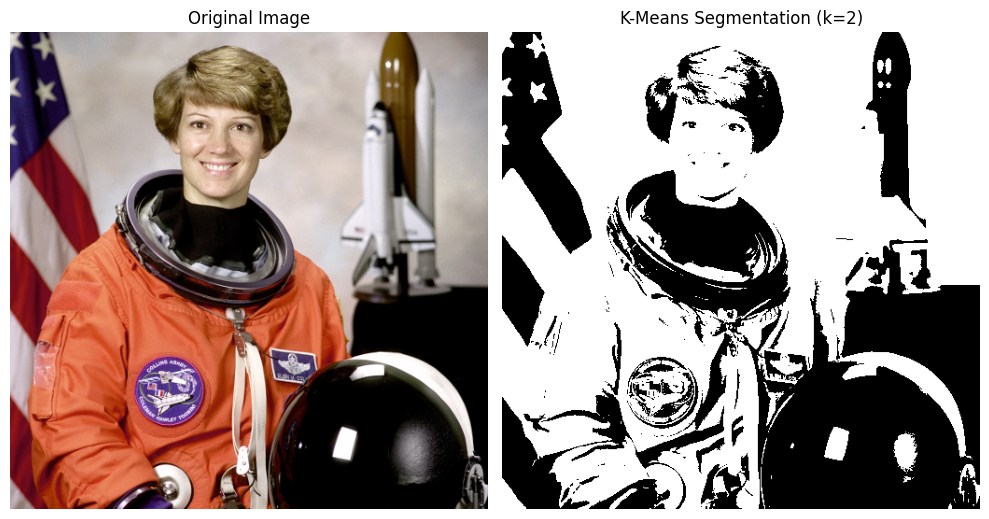

In [7]:
#Task 2: Load an image and apply an unsupervised segmentation method (e.g., K-Means).
#Evaluate and comment on the outcome.
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

I = data.astronaut()

v_I = I.reshape(-1, I.shape[2])
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)
v_kmeans = kmeans.predict(v_I)
I_kmeans = np.reshape(v_kmeans, (I.shape[0], I.shape[1]))

fig = plt.figure(figsize=(10, 10))

gs = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(I)
ax1.set_title('Original Image')
ax1.set_axis_off()
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('K-Means Segmentation (k={})'.format(n_clus))
ax2.set_axis_off()

plt.tight_layout()
plt.savefig('kmeans_segmentation_manual.png')
plt.show()


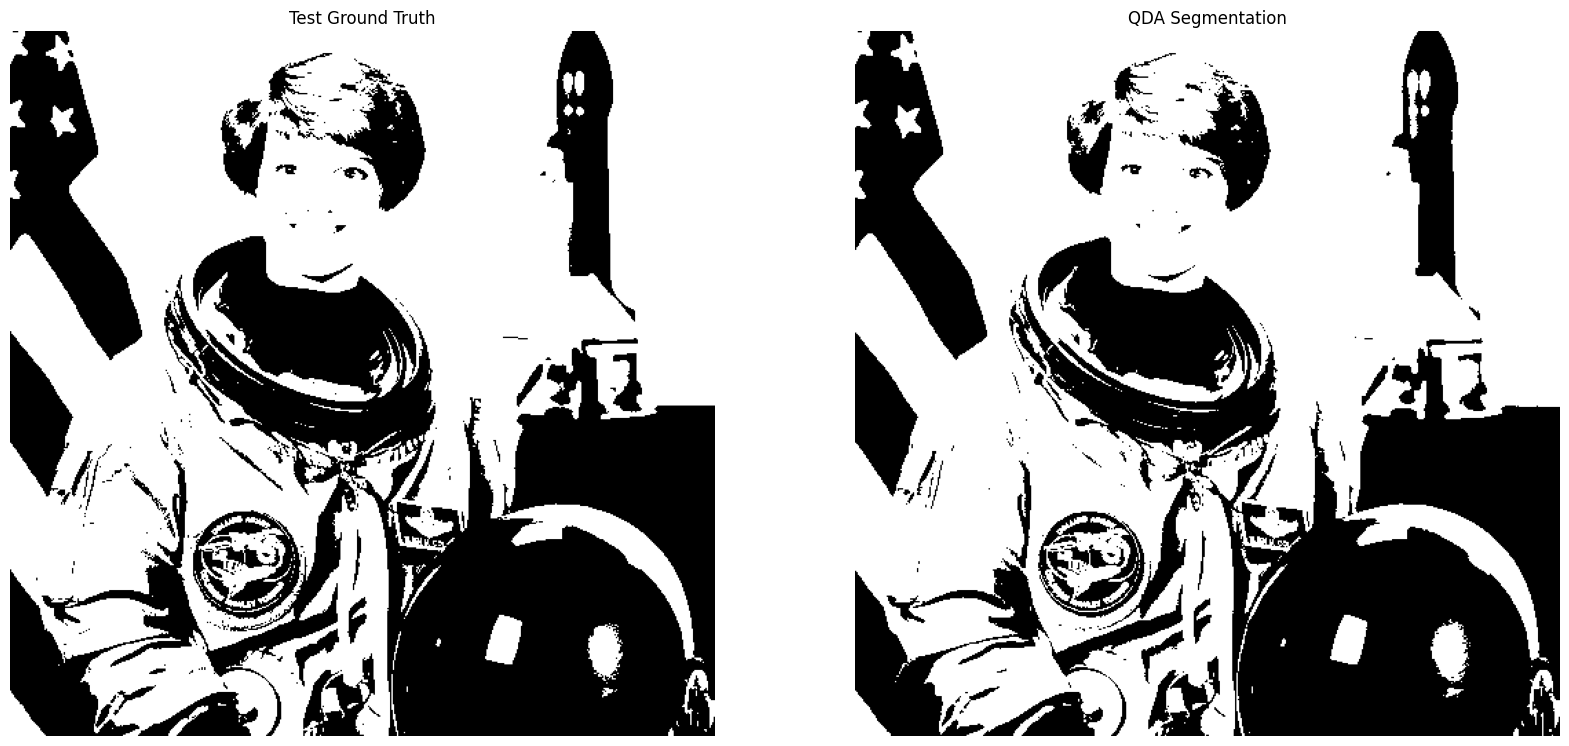

In [9]:
#Task 3: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier).
#Discuss the effectiveness and limitations.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

I= data.astronaut()
I_gray = rgb2gray(I)

I_train = I_gray.copy()
I_train_GT = np.zeros_like(I_gray, dtype=np.uint8)
I_train_GT[I_gray > 0.4] = 1

v_I_train = I_train.reshape(-1, 1)
v_train_GT = I_train_GT.reshape(-1, 1).astype(bool)

qda_model = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_model.fit(v_I_train, v_train_GT.ravel())

v_qda = qda_model.predict(v_I_train)
I_qda = v_qda.reshape(I_gray.shape).astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(I_train_GT, cmap=plt.cm.gray)
ax[0].set_title('Test Ground Truth')
ax[0].set_axis_off()
ax[1].imshow(I_qda, cmap=plt.cm.gray)
ax[1].set_title('QDA Segmentation')
ax[1].set_axis_off()
plt.show()


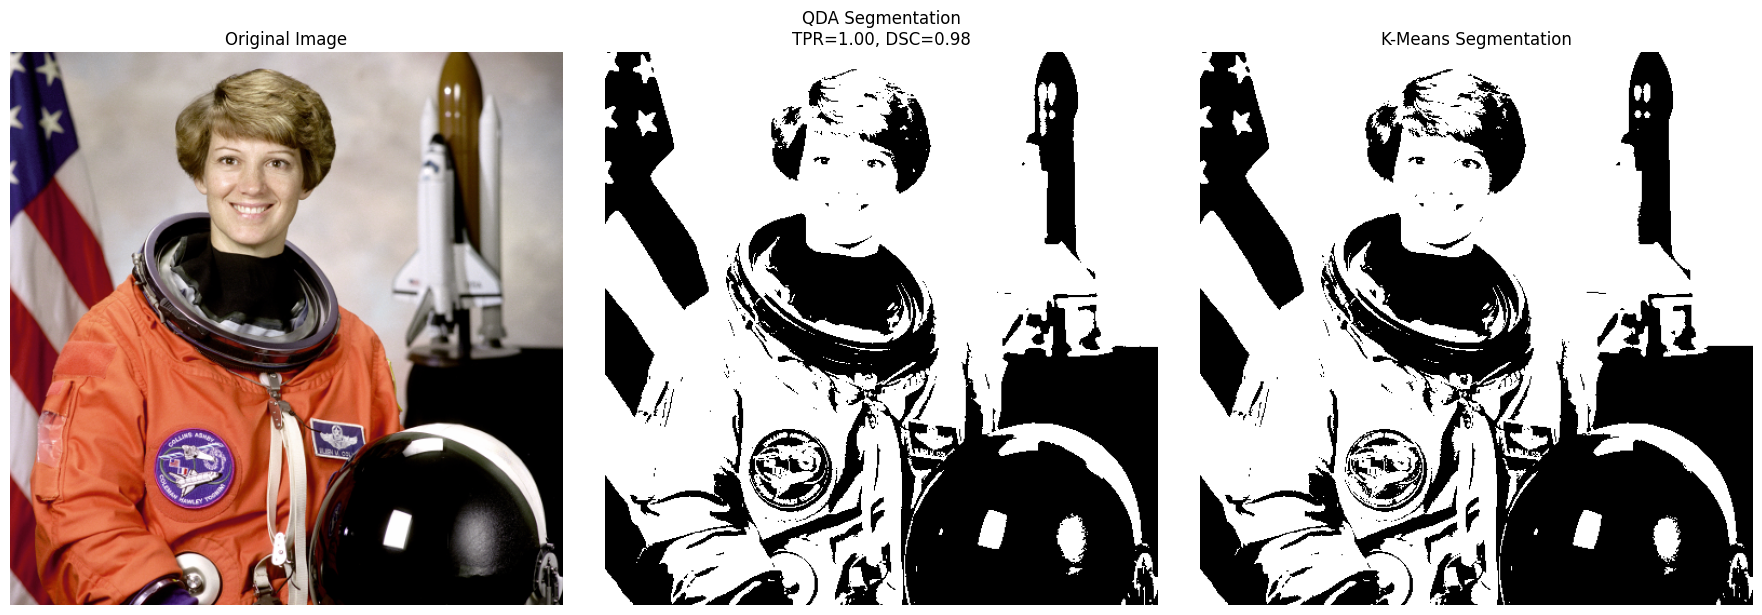

In [14]:
#Task 4: Explain the main differences between supervised and unsupervised segmentation approaches.
#Discuss their advantages and disadvantages, and illustrate your explanation with an example.
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

I_color= data.astronaut()
I_gray = rgb2gray(image)

# QDA (Supervised)
I_train_GT = np.zeros_like(I_gray, dtype=np.uint8)
I_train_GT[I_gray > 0.4] = 1

v_I_train = I_gray.reshape(-1, 1)
v_train_GT = I_train_GT.reshape(-1, 1).astype(bool)

qda_model = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_model.fit(v_I_train, v_train_GT.ravel())
v_qda = qda_model.predict(v_I_train)
I_qda = v_qda.reshape(I_gray.shape).astype(np.uint8)

tn, fp, fn, tp = confusion_matrix(I_train_GT.ravel(), I_qda.ravel()).ravel()
TPR = tp / (tp + fn)
FPR = fp / (fp + tn)
DSC = 2 * tp / (2 * tp + fp + fn)

#K-Means
v_I_color = I_color.reshape(-1, I_color.shape[2])  # RGB values
kmeans = KMeans(n_clusters=2, random_state=0).fit(v_I_color)
v_kmeans = kmeans.predict(v_I_color)
I_kmeans = v_kmeans.reshape(I_color.shape[0], I_color.shape[1])

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(I_color)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(I_qda, cmap='gray')
axs[1].set_title(f"QDA Segmentation\nTPR={TPR:.2f}, DSC={DSC:.2f}")
axs[1].axis('off')

axs[2].imshow(I_kmeans, cmap='gray')
axs[2].set_title("K-Means Segmentation")
axs[2].axis('off')

plt.tight_layout()
plt.show()